# Analysis of airlines Tweets 

## Read the dataset into a dataframe

Read the dataset **'Tweets.csv'** into a dataframe with name **df** using pandas.

In [89]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [91]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
#import spacy
import re,unicodedata,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob,Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re

**Explanation for the above packages:**
- Count Vectorizer: This is used to transform the given text to sparse matrix or a vector by the word frequency count
- Tfidf Vectorizer: This is used to transform the given text to sparse matrix similar to Count Vectorizer or the Bag of Words. The difference is that Tfidf also provides more importance to the high count words and rarity of words relatively.
- LabelEncoder and LabelBinarizer: They convert the categorical strings to numerical values for classification. If there are more than two classes, Encoder is used.
- stopwords: Its a collection of common words to reduce the burden in finding the sense of the text.
- PorterStemmer and WordNetLemmatizer: They are used to get the root word of the word. 
- tokenization: Segmenting the words in a sentence.
- re : Regular Expression in python
- TextBlob: Its used to determine the polarity and subjectivity of the text.

In [92]:
pd.set_option('float_format', '{:f}'.format)

In [103]:
df = pd.read_csv('Tweets.csv')

In [104]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.000000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.348600,NaN,0.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.683700,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.000000,Bad Flight,0.703300,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.000000,Can't Tell,1.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [105]:
df.shape

(14640, 15)

In [106]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

---> We can drop features having huge null values.

In [110]:
df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)
df.shape

(14640, 12)

In [112]:
df.drop(['negativereason','negativereason_confidence','tweet_location','user_timezone'],axis=1,inplace=True)
df.shape

(14640, 8)

In [113]:
df.describe()

,tweet_id,airline_sentiment_confidence,retweet_count
count,14640.000000,14640.000000,14640.000000
mean,569218351767499200.000000,0.900169,0.082650
std,779111158481835.875000,0.162830,0.745778
min,567588278875213824.000000,0.335000,0.000000
25%,568559178101439488.000000,0.692300,0.000000
50%,569477857923110912.000000,1.000000,0.000000
75%,569890473289000960.000000,1.000000,0.000000
max,570310600460525568.000000,1.000000,44.000000


In [116]:
pd.options.display.max_colwidth = 200

In [117]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'airline', 'name', 'retweet_count', 'text', 'tweet_created'],
      dtype='object')

In [118]:
df['text']

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

Remove weird spaces, stopwords and perform basic pre-processing - spelling correction, etc. 

In [119]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
tokenizer = ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')

**From here we are going to consider only the useful columns because of reducing the complexity. They are content, retweets and likes**

In [121]:
df = df[['text','retweet_count']]

In [122]:
df.head()

,text,retweet_count
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,0
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,@VirginAmerica and it's a really big bad thing about it,0


In [123]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Perform Stemming or Lemmatization, comment on the different outputs.

### Removing Outliers and Noise reduction

In [ ]:
stemmer = PorterStemmer()
leammatizer = WordNetLemmatizer()

In [124]:
def remove_html(text):
    return re.sub(r':.*$', ":",text) #Remove urls

def remove_tags(text):
  return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',text)

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser") #Remove https words
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

def denoise_text(text):
    text = remove_html(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_tags(text)
    return text  #Function call
  
df['review'] = df['text'].apply(denoise_text)
df.head(5)

,text,retweet_count,review
0,@VirginAmerica What @dhepburn said.,0,What said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it,0,and it's a really big bad thing about it


### Removing Special characters

In [125]:
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

df['review'] = df['review'].apply(remove_special_characters)
df.head(2)

,text,retweet_count,review
0,@VirginAmerica What @dhepburn said.,0,What said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky


### Stemming


In [126]:
def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['stem_review'] = df['review'].apply(simpleStemmer)
df.head(2)

,text,retweet_count,review,stem_review
0,@VirginAmerica What @dhepburn said.,0,What said,what said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki


### Lemmatization

In [127]:
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['lemmatize_review'] = df['review'].apply(simpleLemmatization)
df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky


### Removing stopwords       

**Here, we are removing stopwords in the lemmatized text**

In [128]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text,is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['final_review'] = df['review'].apply(remove_stopwords)
df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review,final_review
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky,plus youve added commercials experience tacky


### Normalised train and test reviews

In [130]:
df.shape

(14640, 6)

In [131]:
norm_train_reviews = df.final_review[:10000]
print(norm_train_reviews[0])

norm_test_reviews=df.final_review[10000:]
print(norm_test_reviews[14400])

said
3 days BAGs amazing way neglect customers


### Bag of Words

In [132]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (10000, 120688)
BOW_cv_test: (4640, 120688)


In [133]:
cv_train_reviews[1]

<1x120688 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [134]:
cv_train_reviews[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

### Tf-idf; Term frequency and inverse document frequency

In [135]:
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)


print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (10000, 120688)
Tfidf_test: (4640, 120688)


### Polarity and subjectivity

In [136]:
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

df['polarity'] = df['final_review'].apply(pol)
df['subjectivity'] = df['final_review'].apply(sub)

df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said,said,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky,plus youve added commercials experience tacky,0.000000,0.000000


### Question 06

### Plot a graph to visualize the most common words used by Donald Trump in his tweets.

In [137]:
tok = lambda x:word_tokenize(x)
df['tokenize'] = df['final_review'].apply(tok)
df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said,said,0.000000,0.000000,[said]
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky,plus youve added commercials experience tacky,0.000000,0.000000,"[plus, youve, added, commercials, experience, tacky]"


In [138]:

import itertools,collections

new_tokenize = df['tokenize']
all_words = list(itertools.chain(*new_tokenize))

In [139]:
counts = collections.Counter(all_words)
count_frequency = counts.most_common(200)

clean_tweets = pd.DataFrame(counts.most_common(200),columns=['words', 'count'])
clean_tweets.head()

,words,count
0,flight,3029
1,get,1260
2,Cancelled,1026
3,service,906
4,http,885


No of most common words to plot: 25


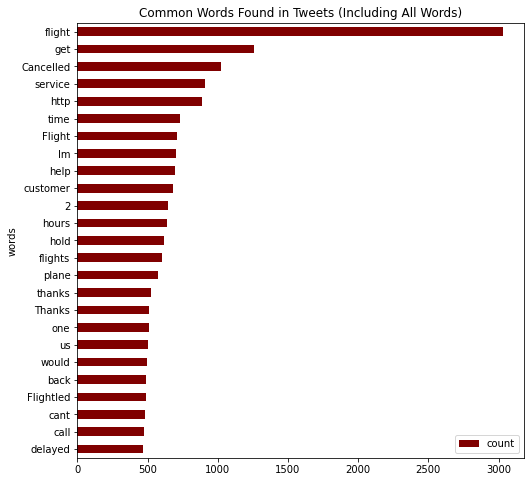

In [140]:
Number = input('No of most common words to plot: ')
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='maroon')
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [141]:
PNN = df['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
new_review = df['final_review']
new_review = new_review.tolist()
PNN = PNN.tolist()

dict = {'text':new_review, 'polarity':PNN}
pnn = pd.DataFrame(dict)
pnn.head()

,text,polarity
0,said,Neutral
1,plus youve added commercials experience tacky,Neutral
2,didnt today Must mean need take another trip,Negative
3,really aggressive blast obnoxious entertainment guests faces little recourse,Neutral
4,really big bad thing,Negative


### Question 08

### Word Cloud

Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets

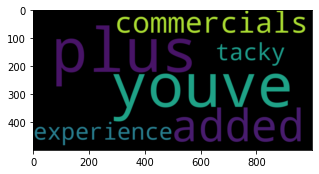

In [142]:
plt.figure(figsize=(5,5))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

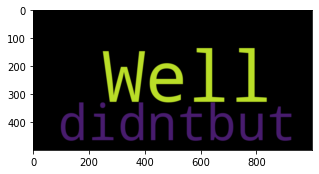

In [143]:
plt.figure(figsize=(5,5))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

### Question 09

### Converting the numerical data to categorical - Positive and Negative

Based on the polarity scores of every tweet, plot the mean positivity / negativity scores with respect to year.

In [144]:

df['PN'] = df['polarity'].apply(lambda x: "Positive" if x>=0 else "Negative")

In [145]:
df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said,said,0.000000,0.000000,[said],Positive
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky,plus youve added commercials experience tacky,0.000000,0.000000,"[plus, youve, added, commercials, experience, tacky]",Positive


### Label Binarizer

In [146]:
lb = LabelBinarizer()
df['label'] = lb.fit_transform(df['PN'])

In [147]:
df.head(2)

,text,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN,label
0,@VirginAmerica What @dhepburn said.,0,What said,what said,What said,said,0.000000,0.000000,[said],Positive,1
1,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plus youve added commercials to the experience tacky,plu youv ad commerci to the experi tacki,plus youve added commercial to the experience tacky,plus youve added commercials experience tacky,0.000000,0.000000,"[plus, youve, added, commercials, experience, tacky]",Positive,1


### Data into train and test data

Split the dataset into train / test set and perform feature engineering to get the top features (or create new features, if required)

**Here, we don't need any feature engineering because we are concerned only with the output that is polarity.** <br>
**The required attributes are formed earlier through out the cleaning process.**<br>
**Required graphs are also plotted.**<br>

In [149]:
train = df.label[:10000]
test = df.label[10000:]

In [180]:
df.shape

(14640, 11)

# Logistic Regression

### Modelling the dataset

In [150]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


### Logistic Regression and Model Performance

In [151]:
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [152]:
print(lr_bow_predict.shape)
print(lr_tfidf_predict.shape)

(4640,)
(4640,)


In [153]:
cv_test_reviews[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [176]:
text = df['text'][10000:].tolist()

In [181]:
dict = {'text':text,'test':test, 'bow':lr_bow_predict, 'tfidf': lr_tfidf_predict}
df1 = pd.DataFrame(dict)

In [182]:
df1.head()

,text,test,bow,tfidf
10000,@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL,0,1,1
10001,@USAirways the link doesn't work..,1,1,1
10002,@USAirways spent 1.5 hours in line trying to get on a flight home tonight only for it to be Cancelled Flightled an hour Late Flightr. Not even snowing at DCA,0,1,1
10003,@USAirways flight 838 now leaving after 6 hour mechanical delay. Need lodging voucher and meals tonight in st Thomas who do I see?,1,1,1
10004,@USAirways care to elaborate on why CHA to DCA is Cancelled Flightled this evening?,1,1,1


In [183]:
df1[df1['test']!=df1['bow']]

,text,test,bow,tfidf
10000,@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL,0,1,1
10002,@USAirways spent 1.5 hours in line trying to get on a flight home tonight only for it to be Cancelled Flightled an hour Late Flightr. Not even snowing at DCA,0,1,1
10006,"@USAirways this has been my WORST flying experience with you guys, you need to do better",0,1,1
10007,@USAirways going to miss my connection because my flight home has been delayed and now no gate agent to get us off the plane-so frustrated,0,1,1
10008,@USAirways never flying you guys again. your customer service is awful,0,1,1
...,...,...,...,...
14610,@AmericanAir I understand the weather issue but you can't expect passengers to wait 24 hours inside airports for whatever reason. Outrageous,0,1,1
14613,"@AmericanAir I used the ""call back"" feature with an operator regarding my flight, got a call 2 hours Late Flightr and got hung up on. #pleasehelp",0,1,1
14618,@AmericanAir 3078 is overweight so you pull 2 dozen passengers off? Why not luggage? Seriously?,0,1,1
14631,@AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.,0,1,1


### Accuracy score

In [185]:
lr_bow_score = accuracy_score(test,lr_bow_predict)
print(lr_bow_score)
lr_tfidf_score = accuracy_score(test,lr_tfidf_predict)
print(lr_tfidf_score)

0.7480603448275862
0.747198275862069


### Classification report

In [186]:
lr_bow_report=classification_report(test,lr_bow_predict,target_names=['Negative','Positive'])
print(lr_bow_report)
lr_tfidf_report = classification_report(test,lr_tfidf_predict,target_names=['Negative','Positive'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Negative       1.00      0.00      0.01      1173
    Positive       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.87      0.50      0.43      4640
weighted avg       0.81      0.75      0.64      4640

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1173
    Positive       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.37      0.50      0.43      4640
weighted avg       0.56      0.75      0.64      4640



### Confusion matrix

In [187]:
cm_bow = confusion_matrix(test,lr_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,lr_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   4 1169]
 [   0 3467]]
[[   0 1173]
 [   0 3467]]


### Question - 11

### Train a Machine learning model using KNN, Decision tree, SVM and Random Forest. 

# Support Vector Machines

In [188]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


### Linear support vector machines for bag of words and tfidf features

In [189]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_bow = svm.fit(cv_train_reviews,train)
print(svm_bow)
svm_tfidf = svm.fit(tv_train_reviews,train)
print(svm_tfidf)

SVC(kernel='linear', random_state=0)
SVC(kernel='linear', random_state=0)


### Model building and evaluation

In [190]:
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


### Accuracy Score

In [191]:
svm_bow_score = accuracy_score(test,svm_bow_predict)
print(svm_bow_score)
svm_tfidf_score = accuracy_score(test,svm_tfidf_predict)
print(svm_tfidf_score)

0.7489224137931034
0.7484913793103448


### Classification report

In [192]:
svm_bow_report = classification_report(test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report = classification_report(test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.58      0.02      0.05      1173
    Negative       0.75      0.99      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.67      0.51      0.45      4640
weighted avg       0.71      0.75      0.65      4640

              precision    recall  f1-score   support

    Positive       1.00      0.01      0.01      1173
    Negative       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.87      0.50      0.43      4640
weighted avg       0.81      0.75      0.64      4640



### Confusion matrix

In [193]:
cm_bow = confusion_matrix(test,svm_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf = confusion_matrix(test,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3447   20]
 [1145   28]]
[[3467    0]
 [1167    6]]


# KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ()

In [195]:
knn_bow = knn.fit(cv_train_reviews,train)
print(knn_bow)
knn_tfidf = knn.fit(tv_train_reviews,train)
print(knn_tfidf)

KNeighborsClassifier()
KNeighborsClassifier()


In [196]:
knn_bow_predict = knn.predict(cv_test_reviews)
print(knn_bow_predict)
knn_tfidf_predict = knn.predict(tv_test_reviews)
print(knn_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [197]:
knn_bow_score = accuracy_score(test,knn_bow_predict)
print(knn_bow_score)
knn_tfidf_score = accuracy_score(test,knn_tfidf_predict)
print(knn_tfidf_score)

0.7474137931034482
0.747198275862069


In [198]:
knn_bow_report = classification_report(test,knn_bow_predict,target_names=['Positive','Negative'])
print(knn_bow_report)
knn_tfidf_report = classification_report(test,knn_tfidf_predict,target_names=['Positive','Negative'])
print(knn_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      1173
    Negative       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.87      0.50      0.43      4640
weighted avg       0.81      0.75      0.64      4640

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      1173
    Negative       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.37      0.50      0.43      4640
weighted avg       0.56      0.75      0.64      4640



In [199]:
cm_bow = confusion_matrix(test,knn_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,knn_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   1 1172]
 [   0 3467]]
[[   0 1173]
 [   0 3467]]


# Decision tree

In [200]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'entropy',max_depth=3)

In [201]:
dtc_bow = dtc.fit(cv_train_reviews,train)
print(dtc_bow)
dtc_tfidf = dtc.fit(tv_train_reviews,train)
print(dtc_tfidf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [202]:
dtc_bow_predict = dtc.predict(cv_test_reviews)
print(dtc_bow_predict)
dtc_tfidf_predict = dtc.predict(tv_test_reviews)
print(dtc_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [203]:
dtc_bow_score = accuracy_score(test,dtc_bow_predict)
print(dtc_bow_score)
dtc_tfidf_score = accuracy_score(test,dtc_tfidf_predict)
print(dtc_tfidf_score)

0.7474137931034482
0.7474137931034482


In [204]:
dtc_bow_report = classification_report(test,dtc_bow_predict,target_names=['Positive','Negative'])
print(dtc_bow_report)
dtc_tfidf_report = classification_report(test,dtc_tfidf_predict,target_names=['Positive','Negative'])
print(dtc_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      1173
    Negative       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.87      0.50      0.43      4640
weighted avg       0.81      0.75      0.64      4640

              precision    recall  f1-score   support

    Positive       1.00      0.00      0.00      1173
    Negative       0.75      1.00      0.86      3467

    accuracy                           0.75      4640
   macro avg       0.87      0.50      0.43      4640
weighted avg       0.81      0.75      0.64      4640



In [205]:
cm_bow = confusion_matrix(test,dtc_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,dtc_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   1 1172]
 [   0 3467]]
[[   1 1172]
 [   0 3467]]


                                                                      **Thank you**